In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## MPI strong scaling

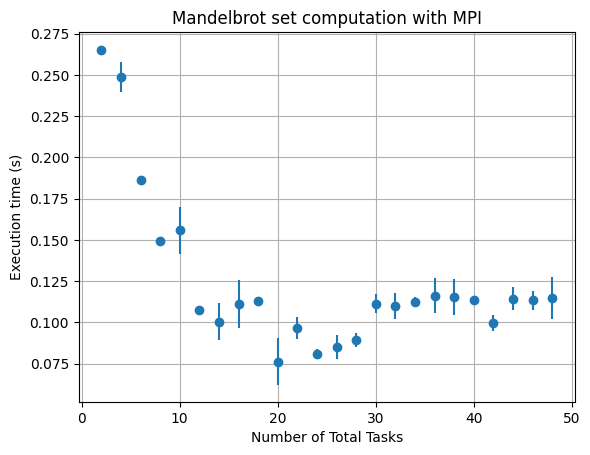

In [23]:
omp_times = pd.read_csv('mpi_strong_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## MPI weak scaling

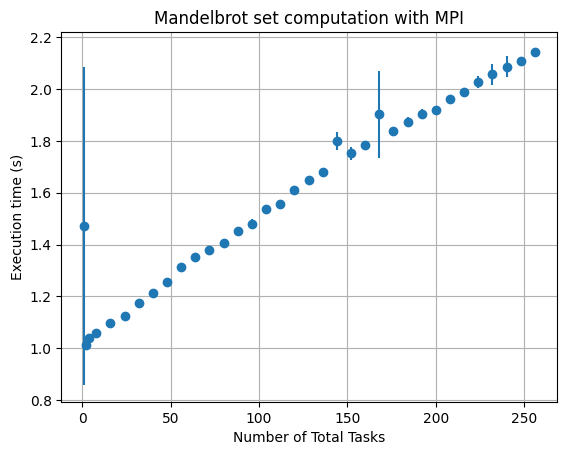

In [25]:
omp_times = pd.read_csv('mpi_weak_scaling.csv')

mean_times = omp_times.groupby('Total Tasks').mean()
std_times = omp_times.groupby('Total Tasks').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Number of Total Tasks')
plt.ylabel('Execution time (s)')
plt.title('Mandelbrot set computation with MPI')
plt.grid()
plt.show()

## OMP strong scaling

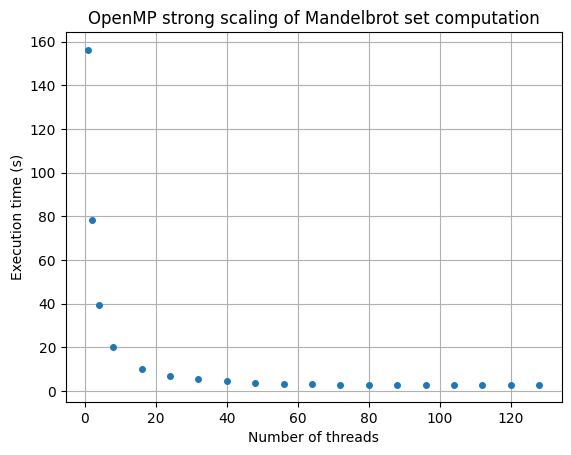

In [47]:
omp_times = pd.read_csv('omp_strong_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

# The sd are too small to be seen
plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('OpenMP strong scaling of Mandelbrot set computation')
plt.grid()
plt.show()

## OMP strong speedup and efficiency

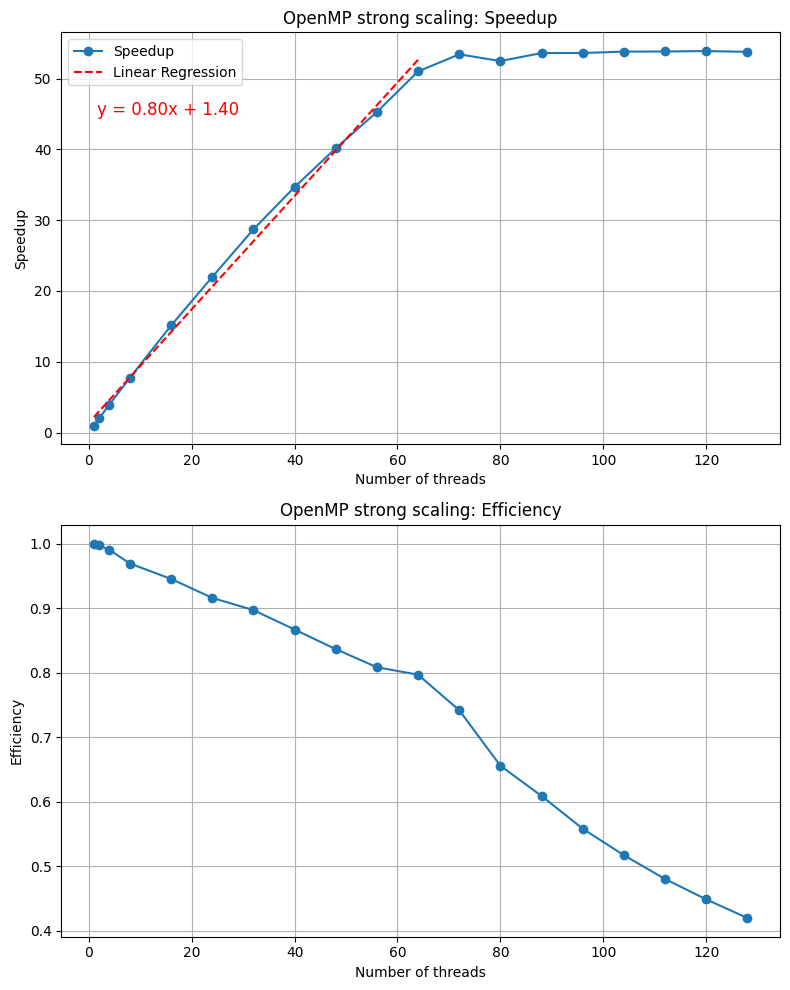

In [57]:
import numpy as np

serial_time = mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

# Plot speedup with points
speedup = serial_time / mean_times['Elapsed Time(s)']
ax1[0].plot(mean_times.index, speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Number of threads')
ax1[0].set_ylabel('Speedup')
ax1[0].set_title('OpenMP strong scaling: Speedup')
ax1[0].grid()

# Perform linear regression on the first half of the data points

x = mean_times.index[:11]
y = speedup[:11]

# Fit a linear model: y = m * x + b
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)

# Plot the regression line on the same plot
ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')

# Display the coefficients (slope and intercept)
slope, intercept = coefficients
ax1[0].text(0.05, 0.8, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)

# Add legend
ax1[0].legend()

# Show the plot
plt.tight_layout()

# Plot efficiency in the second subplot (without regression here)
ax1[1].plot(mean_times.index, serial_time / (mean_times['Elapsed Time(s)'] * mean_times.index), '-o', label='Efficiency')
ax1[1].set_xlabel('Number of threads')
ax1[1].set_ylabel('Efficiency')
ax1[1].set_title('OpenMP strong scaling: Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.show()

## OMP weak scaling

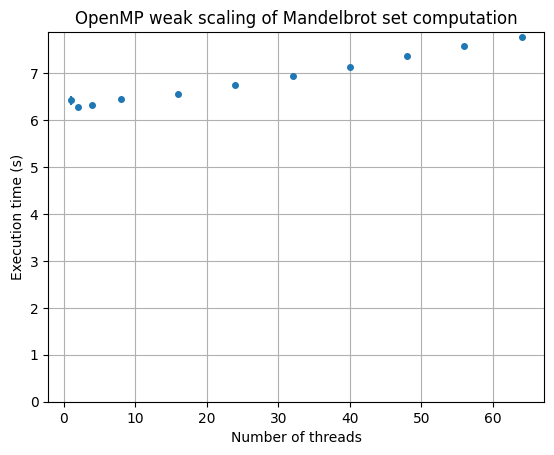

In [45]:
omp_times = pd.read_csv('omp_weak_scaling.csv')

mean_times = omp_times.groupby('Threads').mean()
std_times = omp_times.groupby('Threads').std()

plt.errorbar(mean_times.index, mean_times['Elapsed Time(s)'], yerr=std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.title('OpenMP weak scaling of Mandelbrot set computation')
plt.ylim(0, None)
plt.grid()
plt.show()